<a href="https://colab.research.google.com/github/rafapedra/Data_Science_Projects/blob/master/Visualiza%C3%A7%C3%A3o_com_Seaborn_Rafael_Pedra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TAREFA 01

Usando a função sns.lmplot(), plote um gráfico de dispersão sem a linha de regressão e agrupe os pokemons por estágio de evolução colorindo-os (coluna 'Stage').

Descrição do dados
No arquivo pokemon.csv, você encontrará as seguintes colunas:

Name: Nome em inglês do pokemon
Type 1: Tipo primário do pokemon
Type 2: Tipo secundário do pokemon
Total: Total
HP: Pontos de vida
Attack: Pontos de ataque
Defense: Pontos de defesa
Sp. Atk: Pontos base do ataque especial
Sp. Def: Pontos base da defesa especial
Speed: Pontos de agilidade
Stage: Estágio de evolução
Legendary: Se o pokemon é legendário.

In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from google.colab import files
uploaded = files.upload()

Saving pokemon.csv to pokemon.csv


In [2]:
df = pd.read_csv('pokemon.csv', 
                 encoding='latin-1', index_col=0)
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


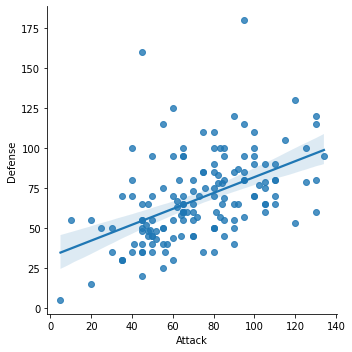

In [3]:
sns.lmplot(x='Attack', y='Defense', data=df)


Usando a função sns.lmplot(), plote um gráfico de dispersão sem a linha de regressão e agrupe os pokemons por estágio de evolução colorindo-os (coluna 'Stage').

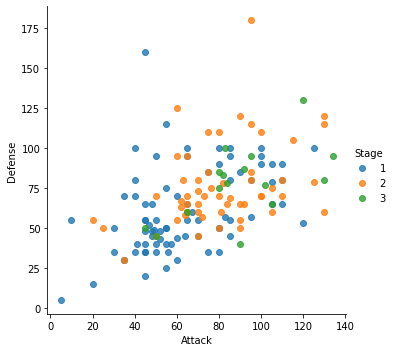

In [4]:
sns.lmplot(data=df, x='Attack', y='Defense', fit_reg=False, hue='Stage')

Customizando com o Matplotlib
E aqui começamos a fazer uso do Matplotlib para customizar o Seaborn. Lembre-se, o Seaborn é um complemento para o Matplotlib. O Seaborn vai lhe trazer muitas facilidades, mas às vezes você precisará fazer uso do Matplotlib para alguns ajustes.

Para definir os limites dos eixos X e Y, vamos usar o Matplotlib:

Primeiro, invoque sua função de plotagem Seaborn normalmente.
Em seguida, invoque as funções de personalização do Matplotlib. Nesse caso, usaremos suas funções plt.ylim() e plt.xlim().

(0.0, 200.0)

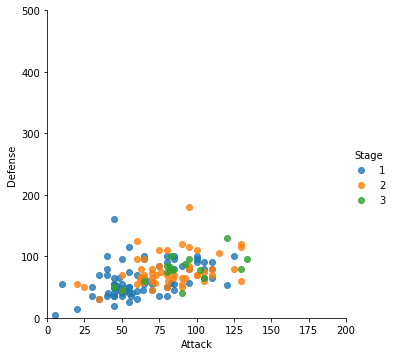

In [5]:
ax = sns.lmplot(x='Attack', y='Defense', data=df, fit_reg=False, hue='Stage')
# Ajustando com o Matplotlib
plt.ylim(0, 500)
plt.xlim(0, 200) 

# TAREFA 02

Usando o Matplotlib, mude os nomes dos eixos x e y para "Ataque" e "Defesa", respectivamente.



Text(0.5, 1.0, 'Ataque e Defesa dos Pokemons por Estágio')

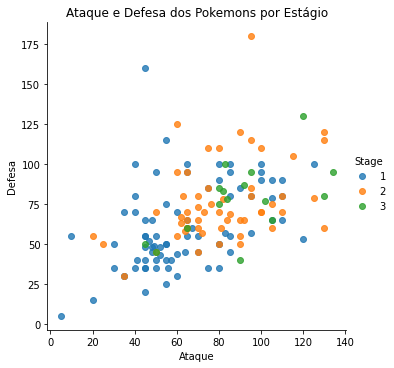

In [6]:
ax = sns.lmplot(x='Attack', y='Defense', data=df, fit_reg=False, hue='Stage')
plt.xlabel('Ataque')
plt.ylabel('Defesa')
plt.title('Ataque e Defesa dos Pokemons por Estágio')

Seaborn e o pandas

Mesmo que este seja um tutorial de Seaborn, o Pandas realmente também desempenha um papel muito importante. As funções de plotagem do Seaborn se beneficiam da estrutuda do dataFrame do pandas. Para plotar um gráfico de diagrama de caixas, você poderia passar o dataframe direto para dentro da função de plotagem sns.boxplot().

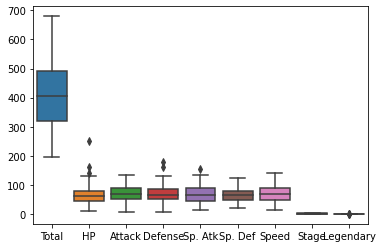

In [7]:
sns.boxplot(data=df)


Apesar de ser um gráfico razoável, alguns colunas não fazem muito sentido:

Podemos remover a coluna "Total", pois temos estatísticas individuais.
Podemos remover as colunas "Stage" e "Lengedary" porque elas não são estatísticas de combate.
Como o Seaborn é amigável com Pandas, esta tarefa é muito mais fácil de ser feita no próprio dataframe.

# TAREFA 03
Remova as colunas "Total", "Stage" e "Legendary" do dataframe e repasse o resultado para a função de plotagem sns.boxplot().


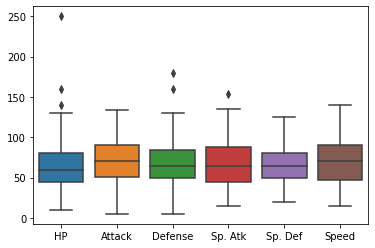

In [8]:
df.drop(columns=['Total', 'Stage', 'Legendary'], inplace=True)
sns.boxplot(data=df)

Temas do Seaborn
Outra vantagem do Seaborn é que ele vem com temas de estilo decente, prontos para uso - whitegrid, darkgrid, white, dark e ticks.

Os gráficos de violino são alternativas úteis às plotagens de caixas. Eles mostram a distribuição (através da espessura do violino) em vez de apenas as estatísticas resumidas.

Por exemplo, podemos visualizar a distribuição do Attack pelo tipo principal de Pokémon:

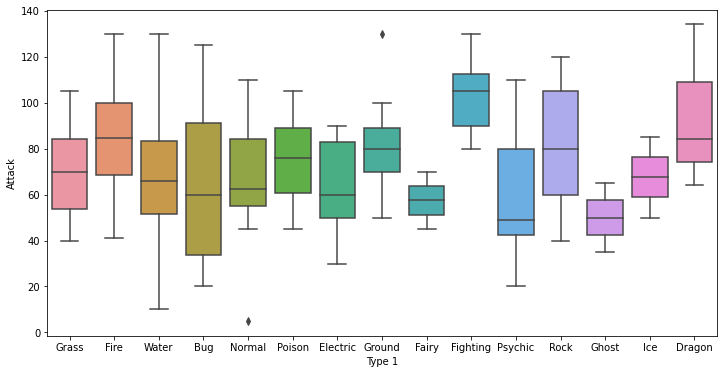

In [9]:
fig = plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='Type 1', y='Attack')

Como você pode ver, os tipos de dragão (Dragon) tendem a ter estatísticas de ataque mais altas do que os tipos de fantasma (Ghost), mas também têm maior variação.

# TAREFA 04
Alterne entre os temas do Seaborn.

DICA: Utilize a função sns.set_style() para definir os temas antes de chamar a função de plotagem.

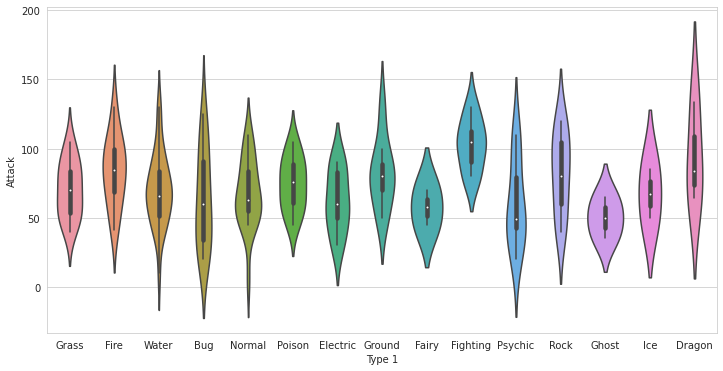

In [10]:
sns.set_style('whitegrid')
fig = plt.figure(figsize=(12,6))
sns.violinplot(data=df, x='Type 1', y='Attack')

Paleta de Cores
Felizmente, o Seaborn nos permite definir paletas de cores personalizadas. Podemos simplesmente criar uma lista Python ordenada de valores hexadecimais de cores.

Vamos usar o Bulbapedia para nos ajudar a criar uma nova paleta de cores:
https://bulbapedia.bulbagarden.net/wiki/Category:Type_color_templates

In [11]:
pokemon_cores = [
    '#78C850',  # Grass
    '#F08030',  # Fire
    '#6890F0',  # Water
    '#A8B820',  # Bug
    '#A8A878',  # Normal
    '#A040A0',  # Poison
    '#F8D030',  # Electric
    '#E0C068',  # Ground
    '#EE99AC',  # Fairy
    '#C03028',  # Fighting
    '#F85888',  # Psychic
    '#B8A038',  # Rock
    '#705898',  # Ghost
    '#98D8D8',  # Ice
    '#7038F8'  # Dragon
]

Agora podemos simplesmente usar o argumento palette dentro da função de plotagem sns.violinplot() recolorir nosso gráfico.

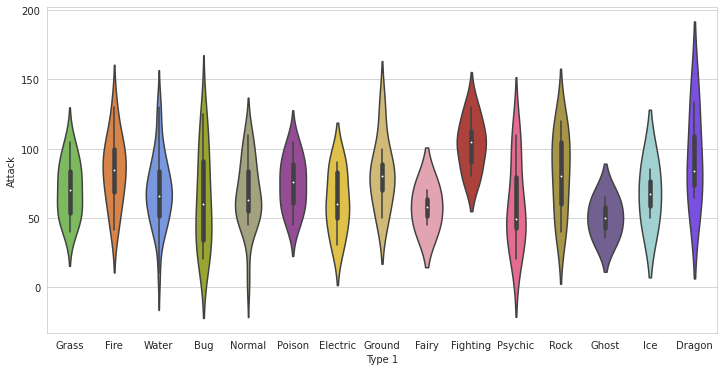

In [12]:

plt.figure(figsize=(12, 6))
sns.violinplot(x='Type 1', y='Attack', data=df, palette=pokemon_cores)

 Os gráficos de violino são ótimos para visualizar distribuições. No entanto, como temos apenas 151 Pokémon em nosso conjunto de dados, podemos simplesmente exibir cada ponto.

Vamos plotar um gráfico de enxame (swarm plot). Essa visualização mostrará cada ponto, enquanto "empilha" aqueles com valores semelhantes.

# TAREFA 05
Plote um gráfico de enxame (swarmplot) usando a paleta do cores do exemplo anterior - pokemon_cores.

DICA: Utilize a função de plotagem sns.swarmplot()

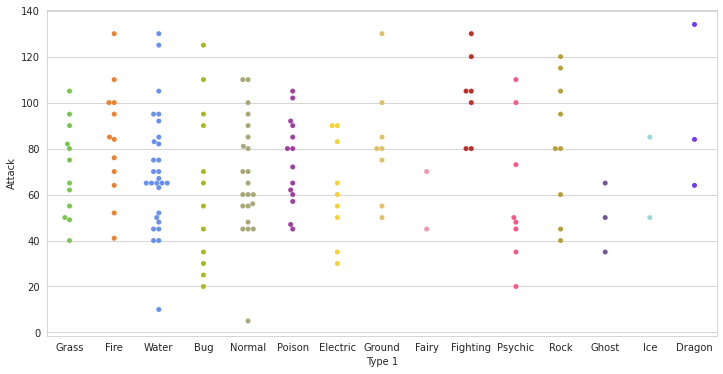

In [13]:
plt.figure(figsize=(12, 6))
sns.swarmplot(data=df, x='Type 1', y='Attack', palette=pokemon_cores)

Sobreposição de gráficos
A resposta é sim. É bastante simples sobrepor plotagens usando Seaborn e funciona da mesma maneira que com Matplotlib. Aqui está o que faremos:

Primeiro, aumentaremos nossa figura usando o Matplotlib.
Então, desenharemos o gráfico de violino. No entanto, definiremos inner = None para remover as barras dentro dos violinos.
Depois, desenharemos o gráfico de enxame. Desta vez, deixaremos os pontos pretos para que eles apareçam mais.
Por fim, definiremos um título usando o Matplotlib.

Text(0.5, 1.0, 'Ataque por tipo de Pokemon')

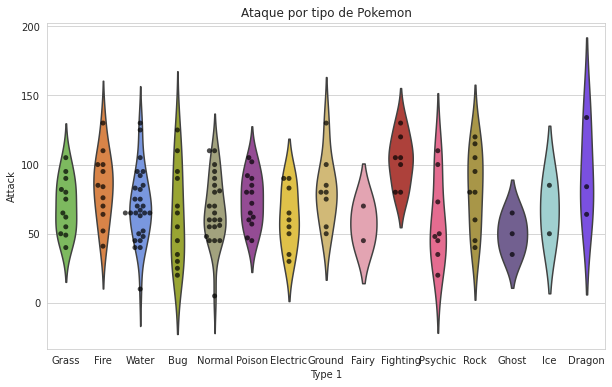

In [14]:
plt.figure(figsize=(10,6))
 
# Crie o gráfico de violino.
sns.violinplot(x='Type 1', y='Attack', data=df, inner=None, palette=pokemon_cores)

# Crie o gráfico de enxame.
sns.swarmplot(x='Type 1', y='Attack', data=df, color='k', alpha=0.7)
 
# Define o título usando o Matplotlib
plt.title('Ataque por tipo de Pokemon')

Outras visualizações
Concluiremos as tarefas com algumas visualizações rápidas, mas que podem ser bastante úteis.

# TAREFA 06

Os mapas de calor ajudam a visualizar dados do tipo matriz. Plote um heartmap do dataframe new_df.

Dica 01: Antes de plot, crie a matriz de correlação do dataframe através do método corr().
Dica 02: Utilize a função de plotagem sns.heartmap().

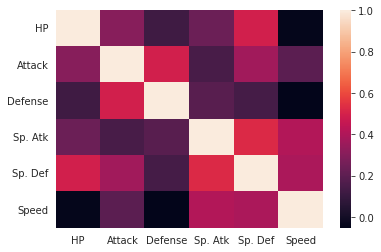

In [15]:
correlacao = df.corr()
sns.heatmap(data=correlacao)

# TAREFA 07
Os histogramas permitem plotar as distribuições de variáveis numéricas. Plote um histograma usando as informações de ataque (Atack) dos pokemons.

Dica: Utilize a função de plotagem sns.distplot().



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


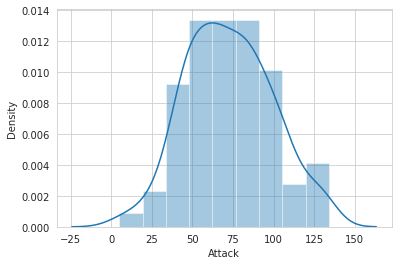

In [16]:
sns.distplot(a=df['Attack'])

# TAREFA 08

Os gráficos de barra ajudam a visualizar as distribuições de variáveis categóricas. Plote um gráfico de barra usando a variável "Type 1".

Dica 01: Utilize a função de plotagem sns.countplot().
Dica 02: Caso a plotagem fique desajustada, aumente o tamanho usando o Matplotlib.

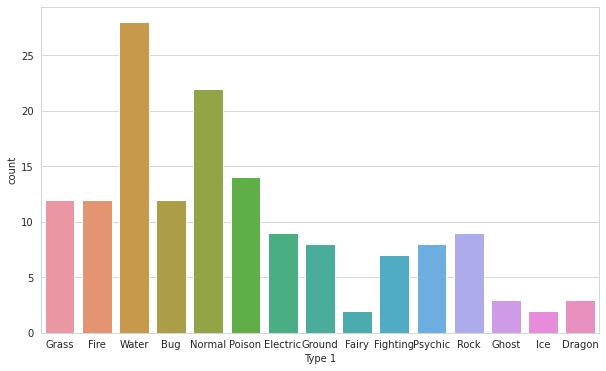

In [17]:
fig = plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Type 1')